In [214]:
import numpy as np
import math
import scipy
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import csv
import pandas as pd

In [215]:
Area = (166/10)**2
Voc = 0.680
Isc = 11.253
Vmp = 0.594
Imp = 10.739
Pmp = 6.28
Efficiency = 22.9

T = 25 + 273

vp = Vmp/Voc
ip = Imp/Isc

In [216]:
FF = vp*ip
print('FF = ',FF)

FF =  0.8336294635156115


In [217]:
# Define the function to find roots
def equation_m(x):
    return x*math.log10(vp) + math.log10(x+1)

# Use fsolve to find the root
initial_guess_m = 10
solution_m = fsolve(equation_m,initial_guess_m)

m = solution_m[0]
print('m = ',m)


# Define the function to find roots
def equation_gamma(x):
    return vp*(1-((1-x)*vp)-x*(vp**m)) - FF

initial_guess_gamma = 1
solution_gamma = fsolve(equation_gamma,initial_guess_gamma)

gamma = solution_gamma[0]
print('gamma = ',gamma)

m =  23.72368196174617
gamma =  0.9937225192933417


Data saved to grade2290.csv


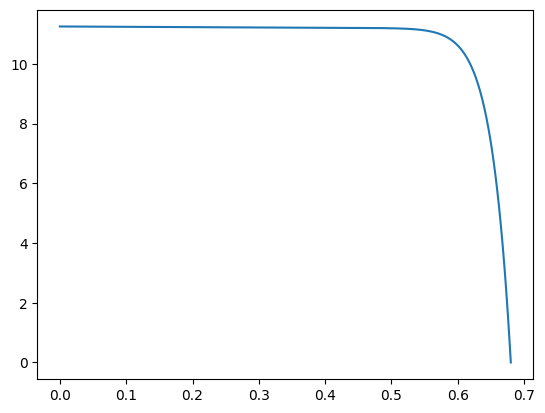

In [ ]:
v_check = np.linspace(0,1,500)
i_check0 = 1 - ((1-gamma)*v_check) - gamma*(v_check**m)

plt.plot(v_check*Voc,i_check0*Isc)


v_csv = np.array(v_check*Voc)
i_csv = np.array(i_check0*Isc)


# Specify the file name
filename = "grade2290.csv"

# # Write data to CSV
# with open(filename, mode='w', newline='') as file:
#     writer = csv.writer(file)
#     # Write the header row
#     writer.writerow(["Current", "Voltage"])
#     # Write the data rows
#     for current, voltage in zip(i_csv, v_csv):
#         writer.writerow([i_csv, v_csv])


# data = {'Current (A)': i_csv, 'Voltage (V)': v_csv}
# df = pd.DataFrame(data)

# # Save to CSV file
# df.to_csv(filename, index=False)

# print(f"Data saved to {filename}")

In [219]:
# Define the system of equations
def equations(vars):
    x, y = vars
    eq1 = (x+1)**(-1/x) - 0.05*(1-y) - vp
    eq2 = vp*(1 - ((1-y)*vp) - y*(vp**x)) - FF
    return [eq1, eq2]

# Initial guess for (x, y)
initial_guess = (10, 1)

# Use fsolve to find the roots
solution_m_gamma = fsolve(equations, initial_guess)

m_actual = solution_m_gamma[0]
gamma_actual = solution_m_gamma[1]

print('m_actual = ',m_actual,'gamma_actual = ',gamma_actual)

m_actual =  23.823175985012355 gamma_actual =  0.9930782293382365


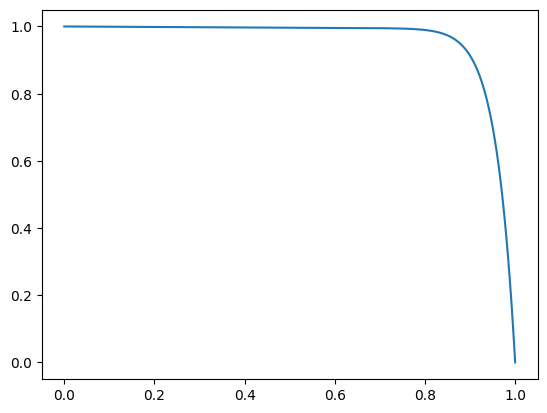

In [220]:
v_check = np.linspace(0,1,500)
i_check1 = 1 - ((1-gamma_actual)*v_check) - gamma_actual*(v_check**m_actual)

plt.plot(v_check,i_check1)

In [221]:
Rsh = Voc/(Isc*(1-gamma_actual))
Rsh_total = Rsh*Area

# Assumption zeta = 1, theta = 0.6 and Temp = 25 degC
zeta = 1
VT = (1.38*10**-23)*T/(1.6*10**-19)
K = 1/(zeta*VT)
theta = 0.6

Rs = ((Voc*K/m)-1) / (theta*gamma*Isc*K)


print('Rshunt for the complete array = ',Rsh_total,' ohms')
print('Rseries for the complete array = ',Rs,' ohms')

Rshunt for the complete array =  2405.6894528807966  ohms
Rseries for the complete array =  0.0004412964893670047  ohms


Text(0, 0.5, 'I (in A)')

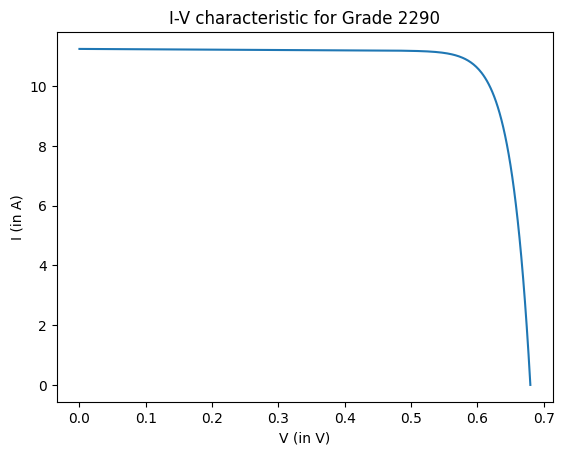

In [222]:
plt.plot(v_check*Voc,i_check1*Isc)
plt.title('I-V characteristic for Grade 2290')
plt.xlabel('V (in V)')
plt.ylabel('I (in A)')